In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train["Item_Weight"] = train.groupby("Item_Fat_Content")['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
test["Item_Weight"] = train.groupby("Item_Fat_Content")['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

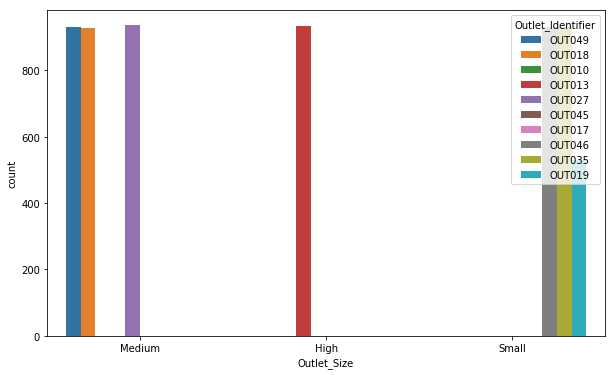

In [11]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.countplot(hue='Outlet_Identifier',x='Outlet_Size',data=train)

In [13]:
from collections import Counter
def filloutletsize(size,identifier):
    Size = []
    for i,j in zip(size,identifier):
        if i is np.nan:
            if j is 'OUT013':
                Size.append('High')
            elif j is 'OUT019' or j is 'OUT035' or j is 'OUT046':
                Size.append('Small')
            else:
                Size.append('Medium')
        else:
            Size.append(i)
    return Size
Counter(filloutletsize(train['Outlet_Size'],train['Outlet_Identifier']))

Counter({'Medium': 5203, 'High': 932, 'Small': 2388})

In [16]:
train['Outlet_Size'] = filloutletsize(train['Outlet_Size'],train['Outlet_Identifier'])
test['Outlet_Size'] = filloutletsize(test['Outlet_Size'],test['Outlet_Identifier'])

In [17]:
X_train = train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
X_test = test.drop(['Item_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']

In [18]:
X_train_cat = X_train[['Item_Weight','Item_Type']]
X_train_num = X_train[['Item_Visibility','Item_MRP']]
X_train_label = X_train[['Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
X_test_cat = X_test[['Item_Weight','Item_Type']]
X_test_num = X_test[['Item_Visibility','Item_MRP']]
X_test_label = X_test[['Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [19]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat).toarray()
X_test_cat = ohe.transform(X_test_cat).toarray()

In [20]:
sc = StandardScaler()
X_train_num = sc.fit_transform(X_train_num)
X_test_num = sc.transform(X_test_num)

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_train_label['Outlet_Identifier'] = lb.fit_transform(X_train_label['Outlet_Identifier'])
X_test_label['Outlet_Identifier'] = lb.transform(X_test_label['Outlet_Identifier'])
X_train_label['Item_Fat_Content'] = lb.fit_transform(X_train_label['Item_Fat_Content'])
X_test_label['Item_Fat_Content'] = lb.transform(X_test_label['Item_Fat_Content'])
X_train_label['Outlet_Size'] = lb.fit_transform(X_train_label['Outlet_Size'])
X_test_label['Outlet_Size'] = lb.transform(X_test_label['Outlet_Size'])
X_train_label['Outlet_Location_Type'] = lb.fit_transform(X_train_label['Outlet_Location_Type'])
X_test_label['Outlet_Location_Type'] = lb.transform(X_test_label['Outlet_Location_Type'])
X_train_label['Outlet_Type'] = lb.fit_transform(X_train_label['Outlet_Type'])
X_test_label['Outlet_Type'] = lb.transform(X_test_label['Outlet_Type'])

In [22]:
X_train_final = np.hstack((X_train_cat,X_train_num,X_train_label))
X_test_final = np.hstack((X_test_cat,X_test_num,X_test_label))

In [23]:
rfmodel = RandomForestRegressor(n_estimators=2200,max_depth=5,max_samples=0.9)
rfmodel.fit(X_train_final,y_train)
print("Training score",rfmodel.score(X_train_final,y_train))
print('root mean squared error',np.sqrt(mean_squared_error(y_train,rfmodel.predict(X_train_final))))

Training score 0.6092304796260488
root mean squared error 1066.6969576987547


In [26]:
predicted_y = rfmodel.predict(X_test_final)

In [29]:
len(predicted_y)

5681

In [30]:
submission = test[['Item_Identifier','Outlet_Identifier']]

In [32]:
submission['Item_Outlet_Sales'] = predicted_y

In [33]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1582.341655
1,FDW14,OUT017,1441.109190
2,NCN55,OUT010,544.269258
3,FDQ58,OUT017,2497.046010
4,FDY38,OUT027,6087.418305


In [36]:
submission.to_csv('sub.csv',index=False)